# Lab 5.04 - Two-sample t-test

In [6]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Exercise 4 - Android Persistence libraries performance comparison

We analyzed the results of performance measurements for Android persistence libraries (Akin, 2016). Experiments were performed for different combinations of *DataSize* (Small, Medium, Large) and *PersistenceType* (GreenDAO, Realm, SharedPreferences, SQLite). For each data size, we were able to determine which persistence type yielded the best results.

Now we will verify if the best persistence type at first glance is also *significantly* better than the competition.

Specifically: Using a two-sample test for each data size, verify that the mean of the best persistence type is significantly lower than the mean of the second best and the worst scoring type.

Can we maintain the conclusion that for a given data size, one persistence type is best, i.e. is significantly better than any other persistence type?

In [41]:
df = pd.read_csv('../data/android_persistence_cpu.csv', delimiter=';')
df.DataSize = df.DataSize.astype(CategoricalDtype(['Small', 'Medium', 'Large'], ordered=True))
df.head()

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


<Axes: xlabel='Time', ylabel='DataSize'>

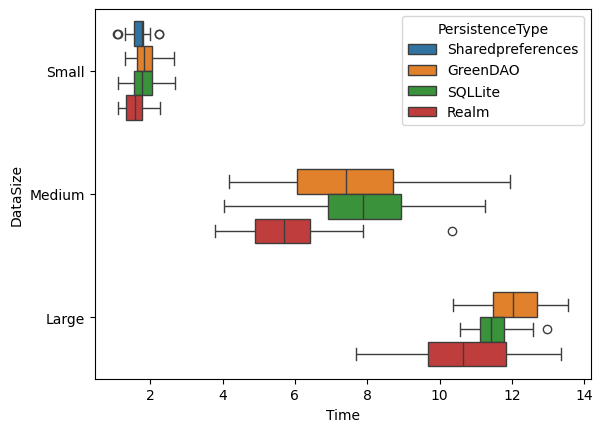

In [16]:
sns.boxplot(data=df, y=df.DataSize, hue=df.PersistenceType, x=df.Time)

In [48]:
sized = df.loc[df['DataSize'] == 'Small']
time = sized.groupby(df['PersistenceType'])['Time']
order = time.mean().sort_values()
best = order.index[0]
sec = order.index[1]

_, pvalue = stats.ttest_ind(
    sized.loc[sized['PersistenceType'] == best]['Time'],
    sized.loc[sized['PersistenceType'] == sec]['Time'],
    alternative='less',
    equal_var=False)
print(f"pvalue = {pvalue}")

pvalue = 0.16992370571901444


In [49]:
sized = df.loc[df['DataSize'] == 'Medium']
time = sized.groupby(df['PersistenceType'])['Time']
order = time.mean().sort_values()
best = order.index[0]
sec = order.index[1]

_, pvalue = stats.ttest_ind(
    sized.loc[sized['PersistenceType'] == best]['Time'],
    sized.loc[sized['PersistenceType'] == sec]['Time'],
    alternative='less',
    equal_var=False)
print(f"pvalue = {pvalue}")

pvalue = 0.0002506300568234833


In [50]:
sized = df.loc[df['DataSize'] == 'Large']
time = sized.groupby(df['PersistenceType'])['Time']
order = time.mean().sort_values()
best = order.index[0]
sec = order.index[1]

_, pvalue = stats.ttest_ind(
    sized.loc[sized['PersistenceType'] == best]['Time'],
    sized.loc[sized['PersistenceType'] == sec]['Time'],
    alternative='less',
    equal_var=False)
print(f"pvalue = {pvalue}")

pvalue = 0.0016999220614984435


### Answers

The table below provides an overview of the best and second best persistence type for each data size (based on the sample mean).

| Data Size | Best  | 2nd Best          | p-value   |
| :-------- | :---- | :---------------- | :-------- |
| Small     | Realm | SharedPreferences | 0.1699    |
| Medium    | Realm | GreenDAO          | 0.0002506 |
| Large     | Realm | SQLite            | 0.0017    |

The conclusion of Akin (2016), which states that Realm is the most efficient persistence type, still holds, but for the small data sets the difference is not significant.

Note that we have not explicitly selected a specific significance level in advance. However, for $\alpha$ = 0.1, 0.05 or even 0.01, the same conclusion can be drawn.